# Logistic Regression
Logistic regression is a binary classification algorithm that predicts the probability that an input belongs to a certain class using a single input feature. In this example, we will be attempting to classify two types of pumpkin seeds: Urgup Sivrisi and Cercevelik.

In [20]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_excel('/Users/tatianagong/Downloads/Pumpkin_Seeds_Dataset/Pumpkin_Seeds_Dataset.xlsx')

# Convert to binary classification problem
df_binary = df[df['Class'].isin(['Çerçevelik', 'Ürgüp Sivrisi'])].copy()
le = LabelEncoder()
df_binary['Label'] = le.fit_transform(df_binary['Class'])  # Çerçevelik=0, Ürgüp Sivrisi=1

# Display
df_binary.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class,Label
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik,0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik,0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik,0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik,0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik,0


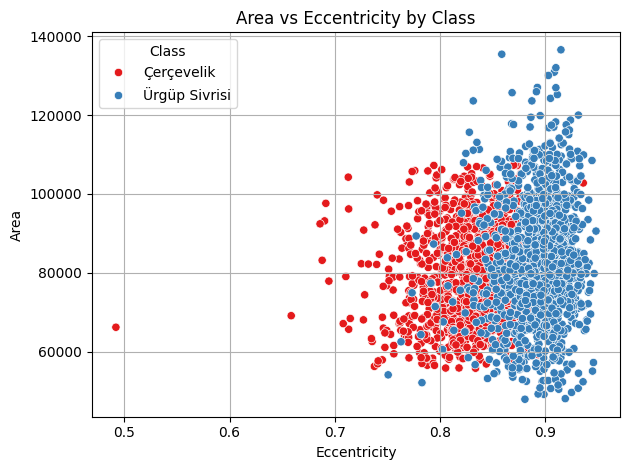

In [23]:
sns.scatterplot(data=df, x='Eccentricity', y='Area', hue='Class', palette='Set1')

plt.title('Area vs Eccentricity by Class')
plt.xlabel('Eccentricity')
plt.ylabel('Area')
plt.legend(title='Class')
plt.grid(True)
plt.tight_layout()
plt.show()

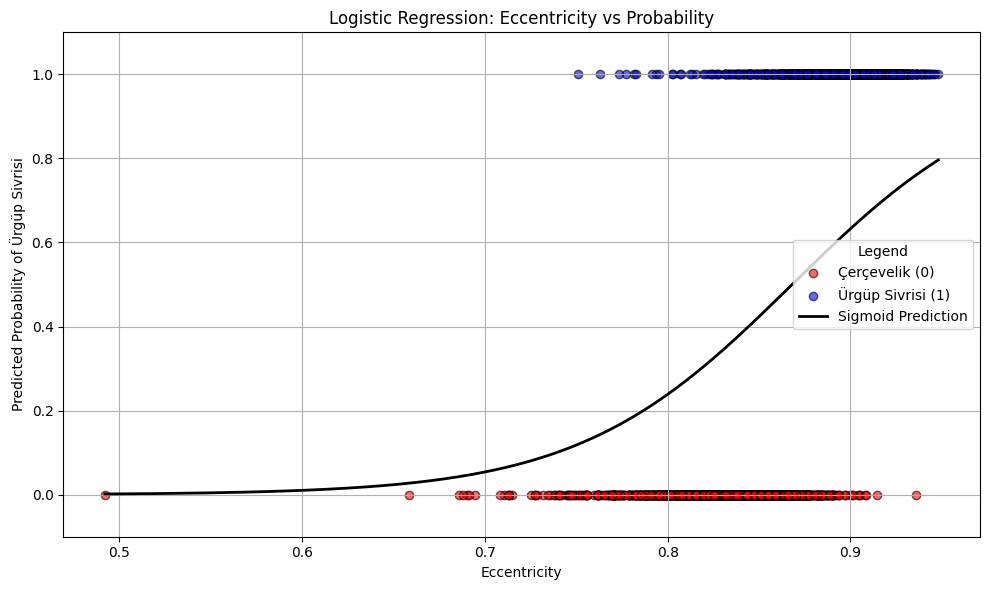

In [32]:
# Step 1: Filter for two classes and use Eccentricity
df_ecc = df[df['Class'].isin(['Çerçevelik', 'Ürgüp Sivrisi'])].copy()
le = LabelEncoder()
df_ecc['Label'] = le.fit_transform(df_ecc['Class'])  # Çerçevelik=0, Ürgüp Sivrisi=1

X = df_ecc[['Eccentricity']].values
y = df_ecc['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 3: Smooth x-range for plotting the sigmoid
ecc_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
probabilities = model.predict_proba(ecc_range)[:, 1]  # Prob of class 1

# Step 4: Plot
plt.figure(figsize=(10, 6))

# Scatter plot for class 0
plt.scatter(X[y == 0], y[y == 0], color='red', edgecolor='k', label='Çerçevelik (0)', alpha=0.6)
# Scatter plot for class 1
plt.scatter(X[y == 1], y[y == 1], color='blue', edgecolor='k', label='Ürgüp Sivrisi (1)', alpha=0.6)

# Sigmoid curve
plt.plot(ecc_range, probabilities, color='black', linewidth=2, label='Sigmoid Prediction')

# Labels and Legend
plt.title("Logistic Regression: Eccentricity vs Probability")
plt.xlabel("Eccentricity")
plt.ylabel("Predicted Probability of Ürgüp Sivrisi")
plt.ylim(-0.1, 1.1)
plt.legend(loc='center right', title="Legend")
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
# Predict and evaluate
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.836

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       251
           1       0.85      0.81      0.83       249

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500


Confusion Matrix:
 [[216  35]
 [ 47 202]]
